In [1]:
from imutils import paths
from lxml import etree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import cv2
import os
import glob

In [2]:
#confirm the current working directory
os.getcwd()

'/home/mattr832/Mani_Vision'

In [3]:
# grab the image paths and randomly shuffle them
imagePaths = list(paths.list_images(r'/home/mattr832/Mani_Vision/Images'))

In [4]:
tree = etree.parse(r'/home/mattr832/Mani_Vision/Annotation/n02085620-Chihuahua/n02085620_199')
root = tree.getroot()

In [5]:
filename_tag = root.find('filename')
filename = filename_tag.text

object_tag = root.find('object')
name = object_tag.find('name')
label = name.text

In [6]:
print(filename, label)

n02085620_199 Chihuahua


In [7]:
os.chdir(r'/home/mattr832/Mani_Vision/Annotation')

annotations = glob.glob('*')

In [8]:
# breeds = []

# for folder in annotations:
#     path = ('/home/mattr832/Mani_Vision/Annotation'+'/'+folder)
#     breed = path.split('-',1)[1]
#     breeds.append(breed)

In [9]:
filename_list = []
breed_list = []

for folder in annotations:
    path = ('/home/mattr832/Mani_Vision/Annotation'+'/'+folder)
    breed = path.split('-',1)[1]
    os.chdir(path)
    myFiles = glob.glob('*')
    for file in myFiles:
        tree = etree.parse(file)
        root = tree.getroot()
        filename_tag = root.find('filename')
        filename = filename_tag.text

        object_tag = root.find('object')
        name = object_tag.find('name')
        label = name.text
        
        filename_list.append(filename)
        breed_list.append(breed)

In [10]:
from keras.preprocessing.image import img_to_array

X = []

# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (160, 160))
    image = img_to_array(image)
    image = image/255
    X.append(image)

Using TensorFlow backend.


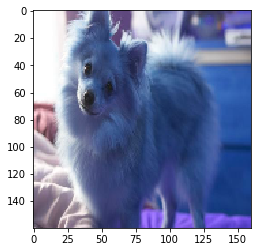

In [11]:
i = 14000

plt.imshow(X[i])

In [12]:
breed_list[i]

'Pomeranian'

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(breed_list)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, 
                                                   random_state = 123)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [17]:
np.shape(X_train)

(18522, 160, 160, 3)

In [18]:
np.shape(y_train)

(18522,)

In [19]:
from keras.utils import to_categorical

# convert the labels from integers to vectors
y_train = to_categorical(y_train, num_classes=120)
y_test = to_categorical(y_test, num_classes=120)

In [20]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [21]:
import tensorflow as tf

tf.keras.backend.clear_session() 

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [22]:
# model = Sequential()
# # first set of CONV => RELU => POOL layers
# model.add(Conv2D(8, (5, 5), padding="same", input_shape=(150,150,3), activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # second set of CONV => RELU => POOL layers
# model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # third set of CONV => RELU => POOL layers
# model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # # fourth set of CONV => RELU => POOL layers
# model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # # fifth set of CONV => RELU => POOL layers
# model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # # sixth set of CONV => RELU => POOL layers
# model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Fully connected => RELU layers
# model.add(Flatten())
# model.add(Dense(480, activation='relu'))
# # model.add(Dense(240, activation='relu'))
# model.add(Dense(120, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# # simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', 
#                    verbose=1, restore_best_weights=True, patience=3)

# model.fit(X_train, y_train, batch_size=32, 
#           epochs=20, shuffle=True,
#          validation_split=0.25, callbacks=[es])

In [24]:
# score = model.evaluate(X_test, y_test, batch_size=32)

In [25]:
# score

In [26]:
# preds = model.predict_classes(X_test)

### Use VGG16 pretrained model

In [46]:
from keras.applications.vgg16 import VGG16
vgg16 = Sequential()
vgg16.add(VGG16(include_top=False, weights='imagenet', input_shape=(160,160,3), pooling=max))
vgg16.add(Flatten())
# vgg16.add(Dense(480, activation='relu'))
# vgg16.add(Dense(240, activation='relu'))
vgg16.add(Dense(120, activation='softmax'))

In [47]:
print(vgg16.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               1536120   
Total params: 16,250,808
Trainable params: 16,250,808
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
vgg16.layers[0].trainable = False

In [49]:
vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   verbose=1, restore_best_weights=True, patience=5)

vgg16.fit(X_train, y_train, batch_size=32, 
          epochs=20, shuffle=True,
         validation_split=0.25, callbacks=[es])

Train on 13891 samples, validate on 4631 samples
Epoch 1/20
13891/13891 [==============================] - 44s 3ms/step - loss: 4.1894 - accuracy: 0.1603 - val_loss: 3.7250 - val_accuracy: 0.2302
Epoch 2/20
13891/13891 [==============================] - 44s 3ms/step - loss: 1.4595 - accuracy: 0.6229 - val_loss: 3.5525 - val_accuracy: 0.2585
Epoch 3/20
13891/13891 [==============================] - 44s 3ms/step - loss: 0.6678 - accuracy: 0.8372 - val_loss: 3.6158 - val_accuracy: 0.2615
Epoch 4/20
13891/13891 [==============================] - 45s 3ms/step - loss: 0.3223 - accuracy: 0.9404 - val_loss: 3.4928 - val_accuracy: 0.2835
Epoch 5/20
13891/13891 [==============================] - 45s 3ms/step - loss: 0.1547 - accuracy: 0.9819 - val_loss: 3.4546 - val_accuracy: 0.2973
Epoch 6/20
13891/13891 [==============================] - 45s 3ms/step - loss: 0.0890 - accuracy: 0.9932 - val_loss: 3.5525 - val_accuracy: 0.2850
Epoch 7/20
13891/13891 [==============================] - 45s 3ms/ste

In [51]:
score = vgg16.evaluate(X_test, y_test, batch_size=32)
print(score)

2058/2058 [==============================] - 5s 2ms/step
[3.465491753625453, 0.2930029034614563]


In [52]:
preds = le.inverse_transform(vgg16.predict_classes(X_test))

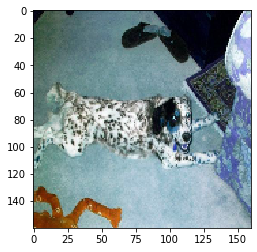

In [53]:
i = 1212

plt.imshow(X_test[i])

In [54]:
preds[i]

'Yorkshire_terrier'

In [41]:
# le.inverse_transform(y_test[i])

In [56]:
from keras.applications.vgg19 import VGG19
vgg19 = Sequential()
vgg19.add(VGG19(include_top=False, weights='imagenet', input_shape=(160,160,3), pooling=max))
vgg19.add(Flatten())
vgg19.add(Dense(120, activation='softmax'))

80142336/80134624 [==============================] - 55s 1us/step


In [57]:
print(vgg19.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 5, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1536120   
Total params: 21,560,504
Trainable params: 21,560,504
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
vgg19.layers[0].trainable = False

In [59]:
vgg19.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   verbose=1, restore_best_weights=True, patience=5)

vgg19.fit(X_train, y_train, batch_size=32, 
          epochs=20, shuffle=True,
         validation_split=0.25, callbacks=[es])

Train on 13891 samples, validate on 4631 samples
Epoch 1/20
13891/13891 [==============================] - 52s 4ms/step - loss: 4.5109 - accuracy: 0.1306 - val_loss: 4.3940 - val_accuracy: 0.1481
Epoch 2/20
13891/13891 [==============================] - 53s 4ms/step - loss: 1.9427 - accuracy: 0.5243 - val_loss: 3.7658 - val_accuracy: 0.2209
Epoch 3/20
13891/13891 [==============================] - 51s 4ms/step - loss: 1.0489 - accuracy: 0.7359 - val_loss: 4.1108 - val_accuracy: 0.2220
Epoch 4/20
13891/13891 [==============================] - 53s 4ms/step - loss: 0.5729 - accuracy: 0.8670 - val_loss: 4.0756 - val_accuracy: 0.2302
Epoch 5/20
13891/13891 [==============================] - 53s 4ms/step - loss: 0.3234 - accuracy: 0.9369 - val_loss: 3.9675 - val_accuracy: 0.2475
Epoch 6/20
13891/13891 [==============================] - 53s 4ms/step - loss: 0.1948 - accuracy: 0.9721 - val_loss: 4.0013 - val_accuracy: 0.2397
Epoch 7/20
13891/13891 [==============================] - 53s 4ms/ste

In [63]:
from keras.applications.resnet50 import ResNet50
resnet50 = Sequential()
resnet50.add(ResNet50(include_top=False, weights='imagenet', input_shape=(160,160,3), pooling=max))
resnet50.add(Flatten())
resnet50.add(Dense(120, activation='softmax'))

/home/mattr832/anaconda3/envs/gpu-dl2/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 67s 1us/step


In [64]:
print(resnet50.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               6144120   
Total params: 29,731,832
Trainable params: 29,678,712
Non-trainable params: 53,120
_________________________________________________________________
None


In [65]:
resnet50.layers[0].trainable = False

In [66]:
resnet50.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   verbose=1, restore_best_weights=True, patience=5)

resnet50.fit(X_train, y_train, batch_size=32, 
          epochs=20, shuffle=True,
         validation_split=0.25, callbacks=[es])

Train on 13891 samples, validate on 4631 samples
Epoch 1/20
13891/13891 [==============================] - 50s 4ms/step - loss: 15.7790 - accuracy: 0.3531 - val_loss: 12.0344 - val_accuracy: 0.0069
Epoch 2/20
13891/13891 [==============================] - 48s 3ms/step - loss: 2.8471 - accuracy: 0.8516 - val_loss: 15.9863 - val_accuracy: 0.0093
Epoch 3/20
13891/13891 [==============================] - 48s 3ms/step - loss: 1.5644 - accuracy: 0.9092 - val_loss: 24.8856 - val_accuracy: 0.0080
Epoch 4/20
 4640/13891 [=========>....................] - ETA: 23s - loss: 1.3361 - accuracy: 0.9263

KeyboardInterrupt: 

In [22]:
from keras.applications.inception_v3 import InceptionV3

In [23]:
# create the base pre-trained model
base = InceptionV3(include_top=False, weights='imagenet', input_shape=(160,160,3), pooling=max)

In [24]:
# add a global spatial average pooling layer
x = base.output
x = MaxPooling2D()(x)
# let's add a fully-connected layer
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(120, activation='softmax')(x)

In [25]:
# this is the model we will train
inc_v3 = Model(inputs=base.input, outputs=predictions)

In [26]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base.layers:
    layer.trainable = False

In [27]:
inc_v3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# simple early stopping
es = EarlyStopping(monitor='val_accuracy', mode='min', 
                   verbose=1, restore_best_weights=True, patience=5)

inc_v3.fit(X_train, y_train, batch_size=32, 
          epochs=10, shuffle=True,
         validation_split=0.25)

Train on 13891 samples, validate on 4631 samples
Epoch 1/10
13891/13891 [==============================] - 38s 3ms/step - loss: 4.3536 - accuracy: 0.0785 - val_loss: 3.5861 - val_accuracy: 0.2749
Epoch 2/10
13891/13891 [==============================] - 30s 2ms/step - loss: 3.5663 - accuracy: 0.1773 - val_loss: 4.0023 - val_accuracy: 0.3289
Epoch 3/10
13891/13891 [==============================] - 30s 2ms/step - loss: 3.2671 - accuracy: 0.2225 - val_loss: 3.9239 - val_accuracy: 0.3531
Epoch 4/10
13891/13891 [==============================] - 30s 2ms/step - loss: 3.1240 - accuracy: 0.2490 - val_loss: 3.7729 - val_accuracy: 0.3513
Epoch 5/10
13891/13891 [==============================] - 30s 2ms/step - loss: 2.9965 - accuracy: 0.2717 - val_loss: 4.5103 - val_accuracy: 0.3526
Epoch 6/10
13891/13891 [==============================] - 30s 2ms/step - loss: 2.8832 - accuracy: 0.2936 - val_loss: 4.3362 - val_accuracy: 0.3554
Epoch 7/10
13891/13891 [==============================] - 30s 2ms/ste

In [53]:
for i, layer in enumerate(base.layers):
   print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [54]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in inc_v3.layers[:249]:
   layer.trainable = False
for layer in inc_v3.layers[249:]:
   layer.trainable = True

In [55]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
inc_v3.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# simple early stopping
es = EarlyStopping(monitor='val_accuracy', mode='min', 
                   verbose=1, restore_best_weights=True, patience=5)

inc_v3.fit(X_train, y_train, batch_size=32, 
          epochs=10, shuffle=True,
         validation_split=0.25)

Train on 13891 samples, validate on 4631 samples
Epoch 1/10
13891/13891 [==============================] - 41s 3ms/step - loss: 2.2352 - accuracy: 0.4247 - val_loss: 4.4929 - val_accuracy: 0.3762
Epoch 2/10
13891/13891 [==============================] - 34s 2ms/step - loss: 1.9641 - accuracy: 0.4889 - val_loss: 4.4806 - val_accuracy: 0.3809
Epoch 3/10
13891/13891 [==============================] - 34s 2ms/step - loss: 1.7814 - accuracy: 0.5352 - val_loss: 4.4248 - val_accuracy: 0.3852
Epoch 4/10
13891/13891 [==============================] - 34s 2ms/step - loss: 1.6124 - accuracy: 0.5727 - val_loss: 4.4160 - val_accuracy: 0.3818
Epoch 5/10
13891/13891 [==============================] - 34s 2ms/step - loss: 1.4578 - accuracy: 0.6153 - val_loss: 4.2814 - val_accuracy: 0.3863
Epoch 6/10
13891/13891 [==============================] - 35s 2ms/step - loss: 1.3245 - accuracy: 0.6450 - val_loss: 4.2997 - val_accuracy: 0.3854
Epoch 7/10
13891/13891 [==============================] - 128s 9ms/st

In [57]:
score = inc_v3.evaluate(X_test, y_test, batch_size=32)
print(score)

2058/2058 [==============================] - 7s 4ms/step
[4.26621013063036, 0.4047619104385376]


In [58]:
inc_v3_preds = inc_v3.predict(X_test)

In [59]:
inc_v3_preds_final = le.inverse_transform(np.argmax(inc_v3_preds,axis=1))

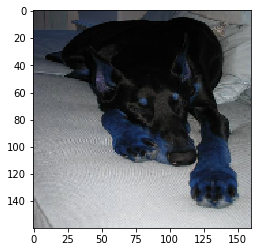

In [66]:
i = 114

plt.imshow(X_test[i])

In [67]:
inc_v3_preds_final[i]

'miniature_pinscher'